In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
# load my data
df = pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


## Define our problem statement

For this project we will try predict is an individual has a good credit score rating

In [12]:
## check my data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [44]:
total_columns, total_rows = df.shape
print('Total columns:', total_columns)
print('Total rows:', total_rows)

Total columns: 100000
Total rows: 24


In [13]:
# drop ID, Name, SSN, Customer_ID columns
df.drop(['ID', 'Name', 'SSN', 'Customer_ID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [14]:
## check for missing values
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [15]:
## check for duplicates
df.duplicated().sum()

0

### Data Visualization

<Axes: xlabel='Credit_Score', ylabel='count'>

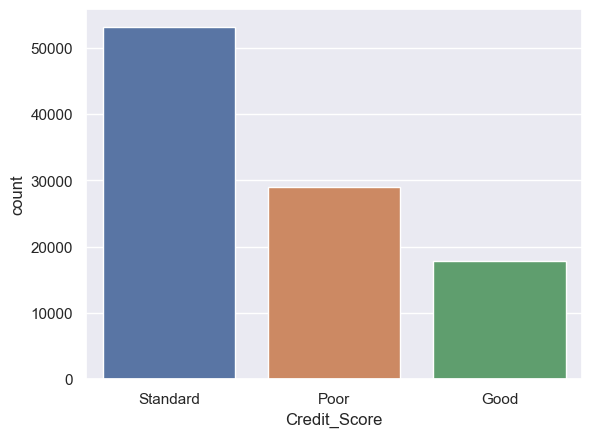

In [17]:
# create a count plot for the Credit_Score
sns.barplot(x=df['Credit_Score'].value_counts().index, y=df['Credit_Score'].value_counts())

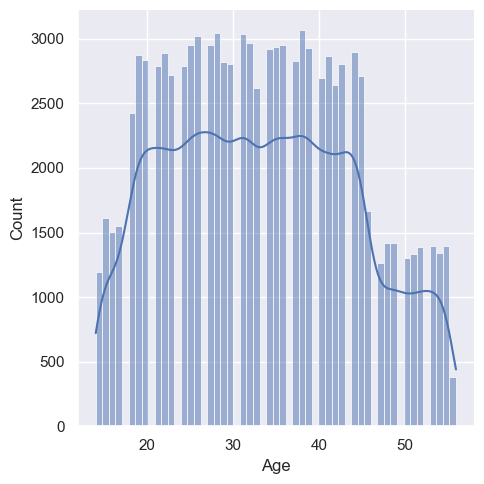

In [18]:
## Age distribution
sns.displot(data=df, x='Age', kde=True)

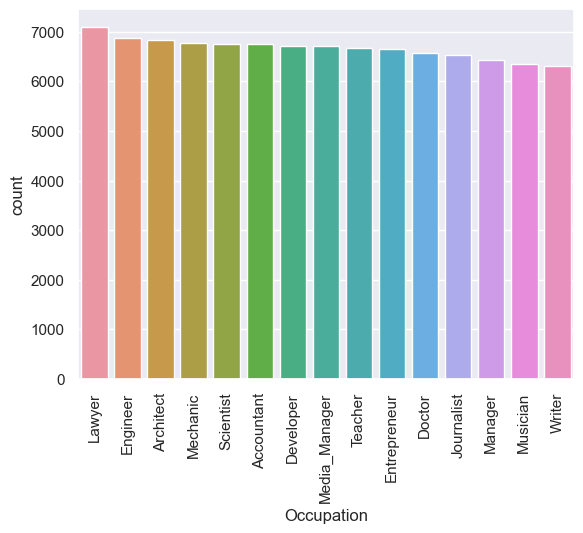

In [23]:
# get all unique occupations
sns.barplot(x=df['Occupation'].value_counts().index, y=df['Occupation'].value_counts())
# rotate x-axis labels
plt.xticks(rotation=90);

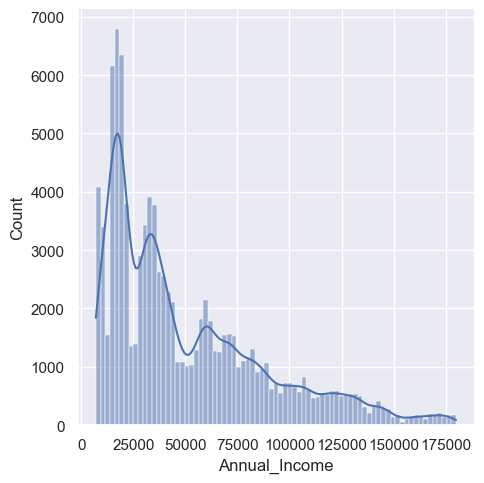

In [24]:
# distribution of annual income 
sns.displot(data=df, x='Annual_Income', kde=True)

## Feature Engineering

In [25]:
## convert all categorical columns to numerical

# create a list of all categorical columns
cat_cols = df.drop('Credit_Score', axis=1).select_dtypes(include='object').columns
cat_cols

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

In [26]:
## create a function to convert categorical columns to numerical
def cat_to_num(df, cat_cols):
    for col in cat_cols:
        df[col] = pd.Categorical(df[col])
        df[col] = df[col].cat.codes
    return df

# apply the function
df = cat_to_num(df, cat_cols)
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,136,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,Good
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,136,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,Good
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,136,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,Good
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,136,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,Good
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,136,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,Good


In [27]:
## normalize numerical columns

## Start the modelling part

In [28]:
## split the data into features and target
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [29]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
## fit my base model

# import model
from sklearn.linear_model import LogisticRegression

# instantiate model
model = LogisticRegression()

# model fitting
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

Accuracy: 0.54412
              precision    recall  f1-score   support

        Good       0.47      0.04      0.07      4422
        Poor       0.53      0.32      0.40      7313
    Standard       0.55      0.84      0.66     13265

    accuracy                           0.54     25000
   macro avg       0.52      0.40      0.38     25000
weighted avg       0.53      0.54      0.48     25000



<Axes: >

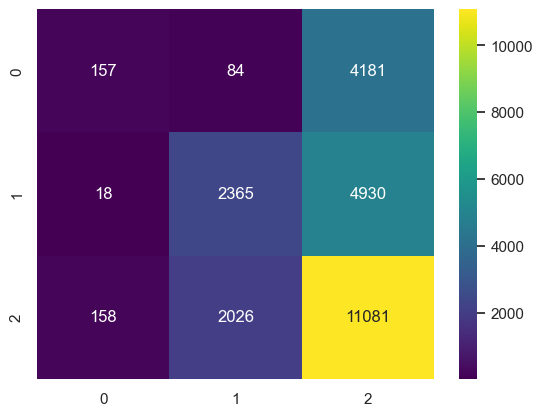

In [32]:
## evaluate the model

from sklearn.metrics import classification_report, confusion_matrix

# print classification report
print(classification_report(y_test, y_pred))

# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')

In [33]:
# fit a decision tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate model
model = DecisionTreeClassifier()

# model fitting
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.69      0.68      0.68      4422
        Poor       0.73      0.73      0.73      7313
    Standard       0.77      0.77      0.77     13265

    accuracy                           0.74     25000
   macro avg       0.73      0.72      0.73     25000
weighted avg       0.74      0.74      0.74     25000



In [37]:
# fit a random forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate model
model = RandomForestClassifier()

# model fitting
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.80      0.81      0.81      4422
        Poor       0.81      0.86      0.84      7313
    Standard       0.86      0.83      0.84     13265

    accuracy                           0.83     25000
   macro avg       0.82      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



<Axes: >

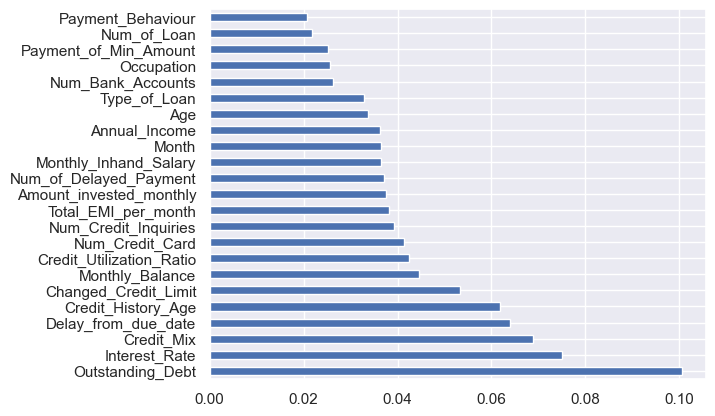

In [41]:
## get feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# plot feature importances
feat_importances.nlargest(27).plot(kind='barh')

In [42]:
# refit the model with the best 10 features
X_best_train = X_train[feat_importances.nlargest(10).index]
X_best_test = X_test[feat_importances.nlargest(10).index]

# fit model
model_best = RandomForestClassifier()

# fit model
model_best.fit(X_best_train, y_train)

# make predictions
y_pred_best = model_best.predict(X_best_test)

# print classification report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

        Good       0.74      0.73      0.73      4422
        Poor       0.79      0.81      0.80      7313
    Standard       0.82      0.81      0.81     13265

    accuracy                           0.79     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.79      0.79      0.79     25000

